In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [2]:
# Read the data
features = pd.read_csv('./medical/historical_X.dat', header=None, sep=" ").values
actions = pd.read_csv('./medical/historical_A.dat', header=None, sep=" ").values
outcome = pd.read_csv('./medical/historical_Y.dat', header=None, sep=" ").values
observations = features[:, :128]
labels = features[:,128] + features[:,129]*2

In [3]:
features.shape

(10000, 130)

In [4]:
observations.shape

(10000, 128)

In [5]:
symptoms = np.append(observations, labels[:,None], 1)
symptoms.shape

(10000, 129)

In [6]:
symptoms_true = symptoms[np.where(symptoms[:,128] != 0)]
symptoms_false = symptoms[np.where(symptoms[:,128] == 0)]

print(symptoms_true.shape)
print(symptoms_false.shape)

(5168, 129)
(4832, 129)


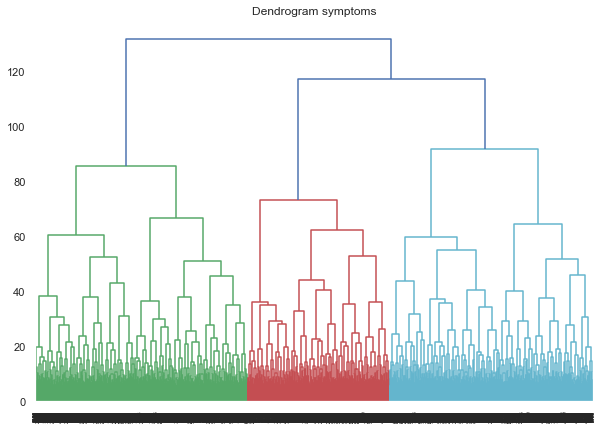

In [13]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram symptoms")
dend = shc.dendrogram(shc.linkage(symptoms_true[:,:127], method='ward')) #without the actual labels.
plt.show()

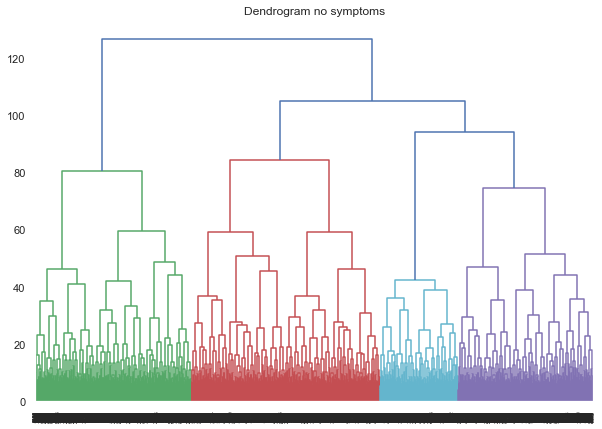

In [14]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram no symptoms")
dend = shc.dendrogram(shc.linkage(symptoms_false[:,:127], method='ward')) #without the actual labels. 
plt.show()

In [10]:
k = 4



In [61]:

cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
#euclidean = distance between datapoints, 'ward' = minimizes the variant between the clusters
h_clusters = cluster.fit_predict(observations)

print(cluster.labels_)

[3 0 0 ... 1 0 0]


In [7]:
def find_clusters(X, n_clusters, rseed = 2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

In [63]:
centers, k_clusters = find_clusters(observations, k)

In [64]:
k_clusters

array([3, 0, 2, ..., 1, 0, 3])

In [65]:
h_clusters

array([3, 0, 0, ..., 1, 0, 0])

In [66]:
obs_clusters_hier = np.append(observations , h_clusters[:,None], 1)
obs_clusters_kmeans = np.append(observations, k_clusters[:,None], 1)

In [67]:
obs_clusters_hier = np.append(obs_clusters_hier, labels[:,None], 1)
obs_clusters_kmeans = np.append(obs_clusters_kmeans, labels[:,None], 1)

In [68]:
obs_clusters_hier.shape

# last column (130) is labels
# 129 is clusters 

(10000, 130)

In [69]:
labels[:20]

array([1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0])

In [70]:
obs_clusters_hier

array([[0, 0, 0, ..., 0, 3, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 1]])

In [71]:
symptoms_true_h = obs_clusters_hier[np.where(obs_clusters_hier[:,129] != 0)]
symptoms_true_k = obs_clusters_kmeans[np.where(obs_clusters_kmeans[:,129] != 0)]


symptoms_true_h.shape

(5168, 130)

In [72]:
symptoms_false_h = obs_clusters_hier[np.where(obs_clusters_hier[:,129] == 0)]
symptoms_false_k = obs_clusters_kmeans[np.where(obs_clusters_kmeans[:,129] == 0)]


symptoms_false_h.shape

(4832, 130)

In [87]:
clusters_no_symp_k = symptoms_false_k[:,128]
clusters_symp_k = symptoms_true_k[:,128]

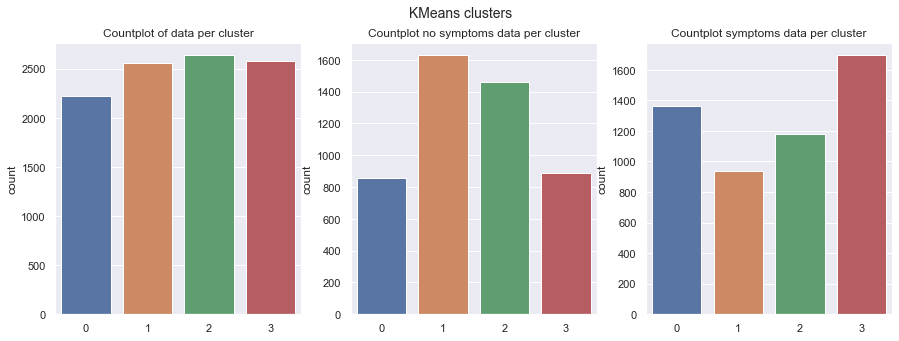

In [91]:
fig1, ax = plt.subplots(figsize = (15, 5), ncols = 3)
sns.countplot(k_clusters, ax = ax[0])
sns.countplot(clusters_no_symp_k, ax = ax[1])
sns.countplot(clusters_symp_k, ax = ax[2])

fig1.suptitle("KMeans clusters", fontsize=14)
ax[0].set_title('Countplot of data per cluster')
ax[1].set_title('Countplot no symptoms data per cluster')
ax[2].set_title('Countplot symptoms data per cluster')


plt.show()

In [39]:
obs_symp_true = symptoms_true[:,:128]
labels_symp_true = symptoms_true[:,128]

centers_symp, k_clusters_symp = find_clusters(obs_symp_true, k)
symp_clusters = np.append(obs_symp_true, k_clusters_symp[:,None], 1)
symp_clusters = np.append(symp_clusters, labels_symp_true[:,None], 1)

In [40]:
symp_clusters

array([[0, 0, 0, ..., 0, 2, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 2],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 2, 1],
       [1, 0, 0, ..., 1, 0, 1]])

In [30]:
# symp_clusters[:,129] zijn de symptomen, 
# symp_clusters[:,128] de clusters

In [31]:
symptom_a = symp_clusters[np.where(symp_clusters[:,129] == 1)]
symptom_b = symp_clusters[np.where(symp_clusters[:,129] == 2)]
symptom_both = symp_clusters[np.where(symp_clusters[:,129] == 3)]

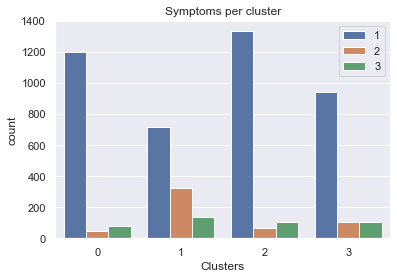

In [50]:
g = sns.countplot(x = symp_clusters[:,128], hue = symp_clusters[:,129])
plt.title('Symptoms per cluster')
plt.xlabel('Clusters')
    
plt.show()

Text(0.5, 1.0, 'countplot hierarchical clusters')

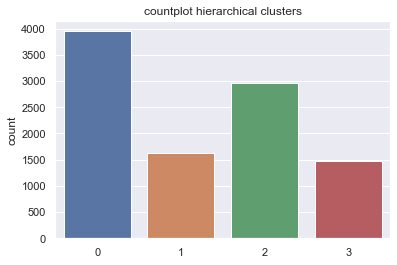

In [76]:
sns.countplot(h_clusters)
plt.title('countplot hierarchical clusters')

Text(0.5, 1.0, 'countplot clusters no symptoms hierarchical')

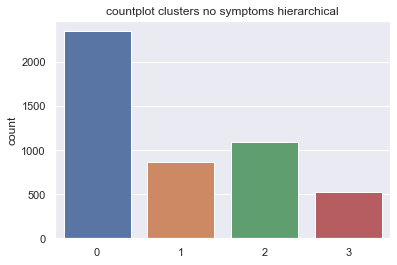

In [77]:
clusters_no_symp_h = symptoms_false_h[:,128]

sns.countplot(clusters_no_symp_h)
plt.title('countplot clusters no symptoms hierarchical')

Text(0.5, 1.0, 'countplot clusters symptoms hierarchical')

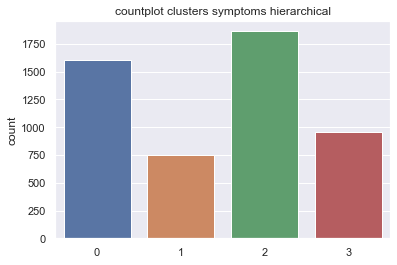

In [78]:
clusters_symp_h = symptoms_true_h[:,128]

sns.countplot(clusters_symp_h)
plt.title('countplot clusters symptoms hierarchical')

For both kmeans clustering and hierarchical clustering the people with symptoms seem to fall in different categories than the people without symptoms, even though there is a lot of overlap. 

In [6]:
# target = labels 
# data = observations

In [7]:
data = np.append(observations, labels[:,None], 1)
data.shape

#target = data[:,128]

(10000, 129)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold

In [9]:
clf = RandomForestClassifier(n_estimators=130, random_state=0)
clf.fit(data[:,:128], data[:,128])

#clf_cv = cross_validate(clf, data[:,:128], data[:,128], cv = 5, return_estimator = True)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
kf = KFold(n_splits=10)
rfc = RandomForestClassifier()
count = 1

X = data[:,:128]
y = data[:,128]

imp_sorted_ = {}
for train, _ in kf.split(X, y):
    rfc.fit(X[train, :], y[train])
    
    for key, value in enumerate(rfc.feature_importances_):    
        imp_sorted_[key] = imp_sorted_.get(key, 0) + value

    
    #print(imp_sorted[:5])
    

/Users/jolyndevis/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
imp_sorted_

{0: 0.11384735214433733,
 1: 0.13518092486608102,
 2: 0.05751368355084474,
 3: 0.45614996740373415,
 4: 0.08750802443757931,
 5: 0.7497435974972563,
 6: 0.061947965377965826,
 7: 0.058788267523328254,
 8: 0.058296031387540956,
 9: 0.07410180470613355,
 10: 0.05039852549632124,
 11: 0.19608587888669526,
 12: 0.06205893985889919,
 13: 0.06595840865226685,
 14: 0.054558086494501175,
 15: 0.06186264463327072,
 16: 0.059762583026531355,
 17: 0.056337549490870505,
 18: 0.05718881670371723,
 19: 0.05801245182092933,
 20: 0.05366458525612166,
 21: 0.058643157021539306,
 22: 0.06510909720695811,
 23: 0.056662890829991486,
 24: 0.05823479530828169,
 25: 0.05714373417026642,
 26: 0.05637368321412213,
 27: 0.05325338614132485,
 28: 0.0758435883860957,
 29: 0.055997010813008,
 30: 0.060331718081589415,
 31: 0.05447746222293372,
 32: 0.055928461380159666,
 33: 0.05403069328814349,
 34: 0.06295622482853742,
 35: 0.05866444534076669,
 36: 0.05046848761257609,
 37: 0.05732154939257621,
 38: 0.063005248

In [3]:
Xtrain, Xholdout, ytrain, yholdout = train_test_split(observations, outcome, test_size = 0.5)

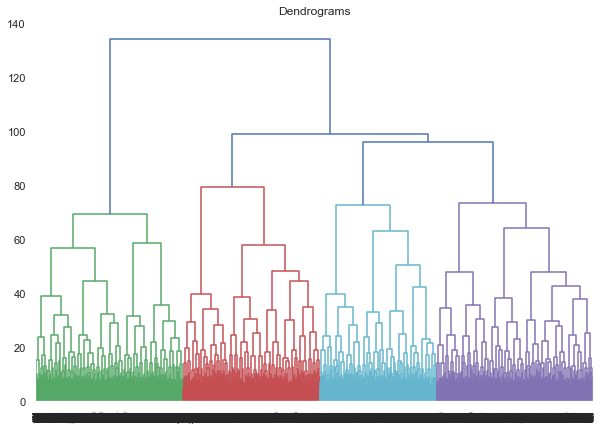

In [4]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(Xtrain, method='ward'))
plt.show()